In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [47]:
airport = pd.read_csv('./dataverse_files/airports.csv')

In [46]:
# flight_2008 = pd.read_csv('./dataverse_files/2008.csv')
flight_2007 = pd.read_csv('./dataverse_files/2007.csv')
flight_2006 = pd.read_csv('./dataverse_files/2006.csv')

flight = pd.concat([flight_2006, flight_2007])
flight.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,45,13,0,NaN,0,0,0,0,0,0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,27,19,0,NaN,0,0,0,0,0,0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,4,11,0,NaN,0,0,0,0,0,0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,16,10,0,NaN,0,0,0,0,0,0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,27,12,0,NaN,0,0,0,0,0,0


In [62]:
flight = flight.sample(20000)
flight_ori_airport = pd.merge(flight, airport, left_on="Origin", right_on="iata")
flight_src_airport = pd.merge(flight_ori_airport, airport, left_on="Dest", right_on="iata")
flight_src_airport['delay'] = flight_src_airport['ActualElapsedTime'] - flight_src_airport['CRSElapsedTime']


In [63]:
flightds =  flight_src_airport[["Year", "Month", "DayOfWeek", "CRSDepTime", "CRSArrTime", "CRSElapsedTime", "Distance", "lat_x", "long_x", "lat_y", "long_y"]]

In [66]:
flightds['delay'] = np.where(flight_src_airport['delay'] > 0, 1, 0)
flightds.dropna(inplace=True)

/var/folders/f1/nhl1t6rs2mq050hfbt4c7dxw0000gn/T/ipykernel_85618/1716332030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flightds['delay'] = np.where(flight_src_airport['delay'] > 0, 1, 0)
/var/folders/f1/nhl1t6rs2mq050hfbt4c7dxw0000gn/T/ipykernel_85618/1716332030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flightds.dropna(inplace=True)


In [7]:
flight_X.head()

,Year,Month,DayofMonth,UniqueCarrier,Origin,AirTime
0,2006,1,11,US,ATL,223.0
1,2006,1,11,US,ATL,214.0
2,2006,1,11,US,ATL,220.0
3,2006,1,11,US,AUS,126.0
4,2006,1,11,US,AUS,132.0


In [76]:
from sklearn import linear_model
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(flightds[["Year", "Month", "DayOfWeek", "CRSDepTime", "CRSArrTime", "CRSElapsedTime", "Distance", "lat_x", "long_x", "lat_y", "long_y"]], flightds['delay'], test_size=0.3)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [71]:
clf = RandomForestClassifier()
model = clf.fit(X_train, Y_train)

Acc: 0.6313333333333333


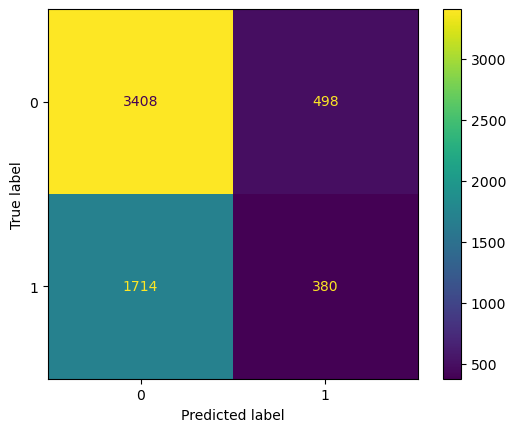

In [78]:
Y_pred = model.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred, labels = model.classes_)
cd = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
cd.plot()
print(f'Acc: {accuracy_score(Y_test, Y_pred)}')

- The model has accuracy of 63%.
- There are a lot of FNs. 